### On board: Gaussian quadrature review

Text(0, 0.5, 'f(x)')

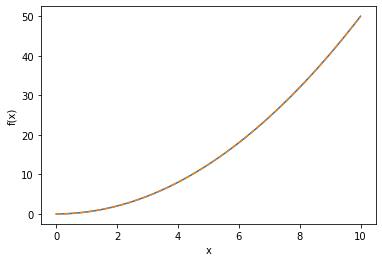

In [1]:
import numpy as np
import matplotlib.pyplot as plt

######################################################################
# http://www-personal.umich.edu/~mejn/computational-physics/gaussxw.py
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
############################################################################################################
#begin my code

# IF YOU INCLUDE PHYSICAL CONSTANTS IN YOUR INTEGRATION YOU WILL MAKE ME VERY SAD! 

def integrand(x):
    return x

def gquad(b = 10, N=100):
    x,w = gaussxw(N)
    a = 0
    #xp = 0.5*(b-a)*x + 0.5*(b+a) # sample points, rescaled to bounds a,b
    #wp = 0.5*(b-a)*w # rescale weights to bounds a, b
    xp, wp = gaussxwab(N,a,b)
    s = sum(integrand(xp)*wp) # add them up!
    return s

x = np.linspace(0,10,100)
I = [gquad(xi) for xi in x]
plt.plot(x,I)
plt.plot(x, 0.5*x**2, linestyle = '--')
plt.xlabel('x')
plt.ylabel(r'f(x)')

### Using recursion to generate Hermite polynomials

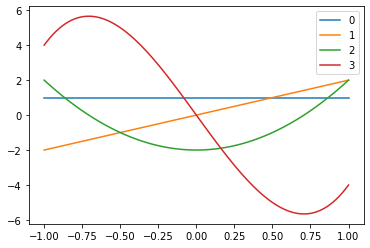

In [2]:
def H(n,x):
    if n==0:
        return np.ones(x.shape)
    elif n==1:
        return 2*x
    else:
        return 2*x*H(n-1, x)-2*(n-1)*H(n-2, x)


x = np.linspace(-1,1, 100)
n = [0,1,2,3]

for ni in n:
    plt.plot(x,H(ni,x),label=ni)

plt.legend()

### Gauss-Hermite quadrature

In [3]:
from scipy.special import roots_hermite
def gquad_hermite(b = 10, N=100):
    x,w = roots_hermite(N) # hermite polynomial roots
    a = 0
    #xp = 0.5*(b-a)*x + 0.5*(b+a) # sample points, rescaled to bounds a,b
    #wp = 0.5*(b-a)*w # rescale weights to bounds a, b
    xp, wp = gaussxwab(N,a,b)
    s = sum(integrand(xp)*wp) # add them up!
    return s

Text(0, 0.5, 'f(x)')

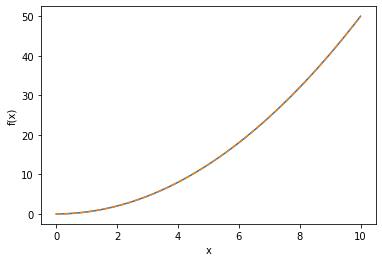

In [4]:
x = np.linspace(0,10,100)
I = [gquad_hermite(xi) for xi in x]
plt.plot(x,I)
plt.plot(x, 0.5*x**2, linestyle = '--')
plt.xlabel('x')
plt.ylabel(r'f(x)')